# Classification
## Decision Tree
### Patient medication recommendation system

In [12]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

In [2]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%203/data/drug200.csv"
df = pd.read_csv(url)

In [3]:
df.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
123,36,F,NORMAL,HIGH,16.753,drugY
131,52,M,LOW,NORMAL,32.922,drugY
83,38,F,HIGH,NORMAL,11.326,drugA
100,31,M,HIGH,NORMAL,11.871,drugA
116,67,M,NORMAL,NORMAL,9.514,drugX
96,58,F,LOW,HIGH,38.247,drugY
137,35,F,HIGH,HIGH,12.894,drugA
153,72,F,LOW,NORMAL,14.642,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX
122,34,M,NORMAL,HIGH,22.456,drugY


We process text columns


In [4]:
encoder = LabelEncoder()
df['Sex'] = encoder.fit_transform(df['Sex'].values)
df['BP'] = encoder.fit_transform(df['BP'].values)
df['Cholesterol'] = encoder.fit_transform(df['Cholesterol'].values)
df.sample(10)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
70,70,1,0,0,13.967,drugB
178,39,1,2,0,15.969,drugY
9,43,1,1,1,19.368,drugY
150,49,1,0,1,8.700,drugA
35,46,1,2,1,7.285,drugX
14,50,0,2,0,12.703,drugX
172,39,0,2,1,17.225,drugY
176,48,1,0,1,10.446,drugA
115,51,1,0,0,18.295,drugY
107,42,1,1,0,20.013,drugY


We can separate `x` and `y`


In [5]:
X = df[['Age','Sex','BP','Cholesterol','Na_to_K']].values
X[0:5]

array([[23.   ,  0.   ,  0.   ,  0.   , 25.355],
       [47.   ,  1.   ,  1.   ,  0.   , 13.093],
       [47.   ,  1.   ,  1.   ,  0.   , 10.114],
       [28.   ,  0.   ,  2.   ,  0.   ,  7.798],
       [61.   ,  0.   ,  1.   ,  0.   , 18.043]])

In [6]:
y = df['Drug'].values

### Train/test split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=20)

### Model

In [8]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

DecisionTreeClassifier()

### Rating

In [9]:
y_predict = tree_model.predict(X_test)

In [10]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         4
       drugC       0.75      1.00      0.86         9
       drugX       1.00      0.81      0.89        21
       drugY       0.97      1.00      0.99        39

    accuracy                           0.95        80
   macro avg       0.94      0.96      0.95        80
weighted avg       0.96      0.95      0.95        80



In [13]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_predict))

DecisionTrees's Accuracy:  0.95


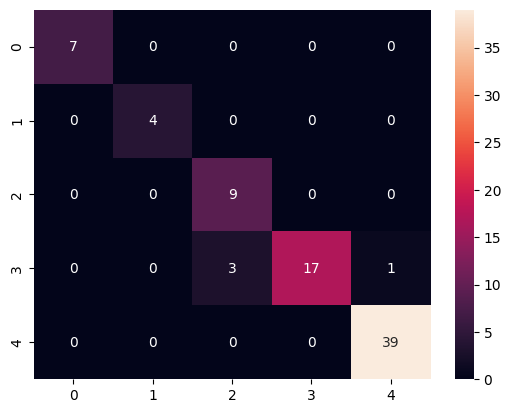

In [14]:
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True)
plt.show()

**Cross-validation**

In [15]:
predict = cross_val_predict(estimator = tree_model, X = X, y = y, cv = 5)
print("Classification Report: \n",classification_report(y, predict))

Classification Report: 
               precision    recall  f1-score   support

       drugA       0.92      1.00      0.96        23
       drugB       1.00      0.88      0.93        16
       drugC       1.00      1.00      1.00        16
       drugX       1.00      0.98      0.99        54
       drugY       0.99      1.00      0.99        91

    accuracy                           0.98       200
   macro avg       0.98      0.97      0.98       200
weighted avg       0.99      0.98      0.98       200



## Decision Tree chizamiz

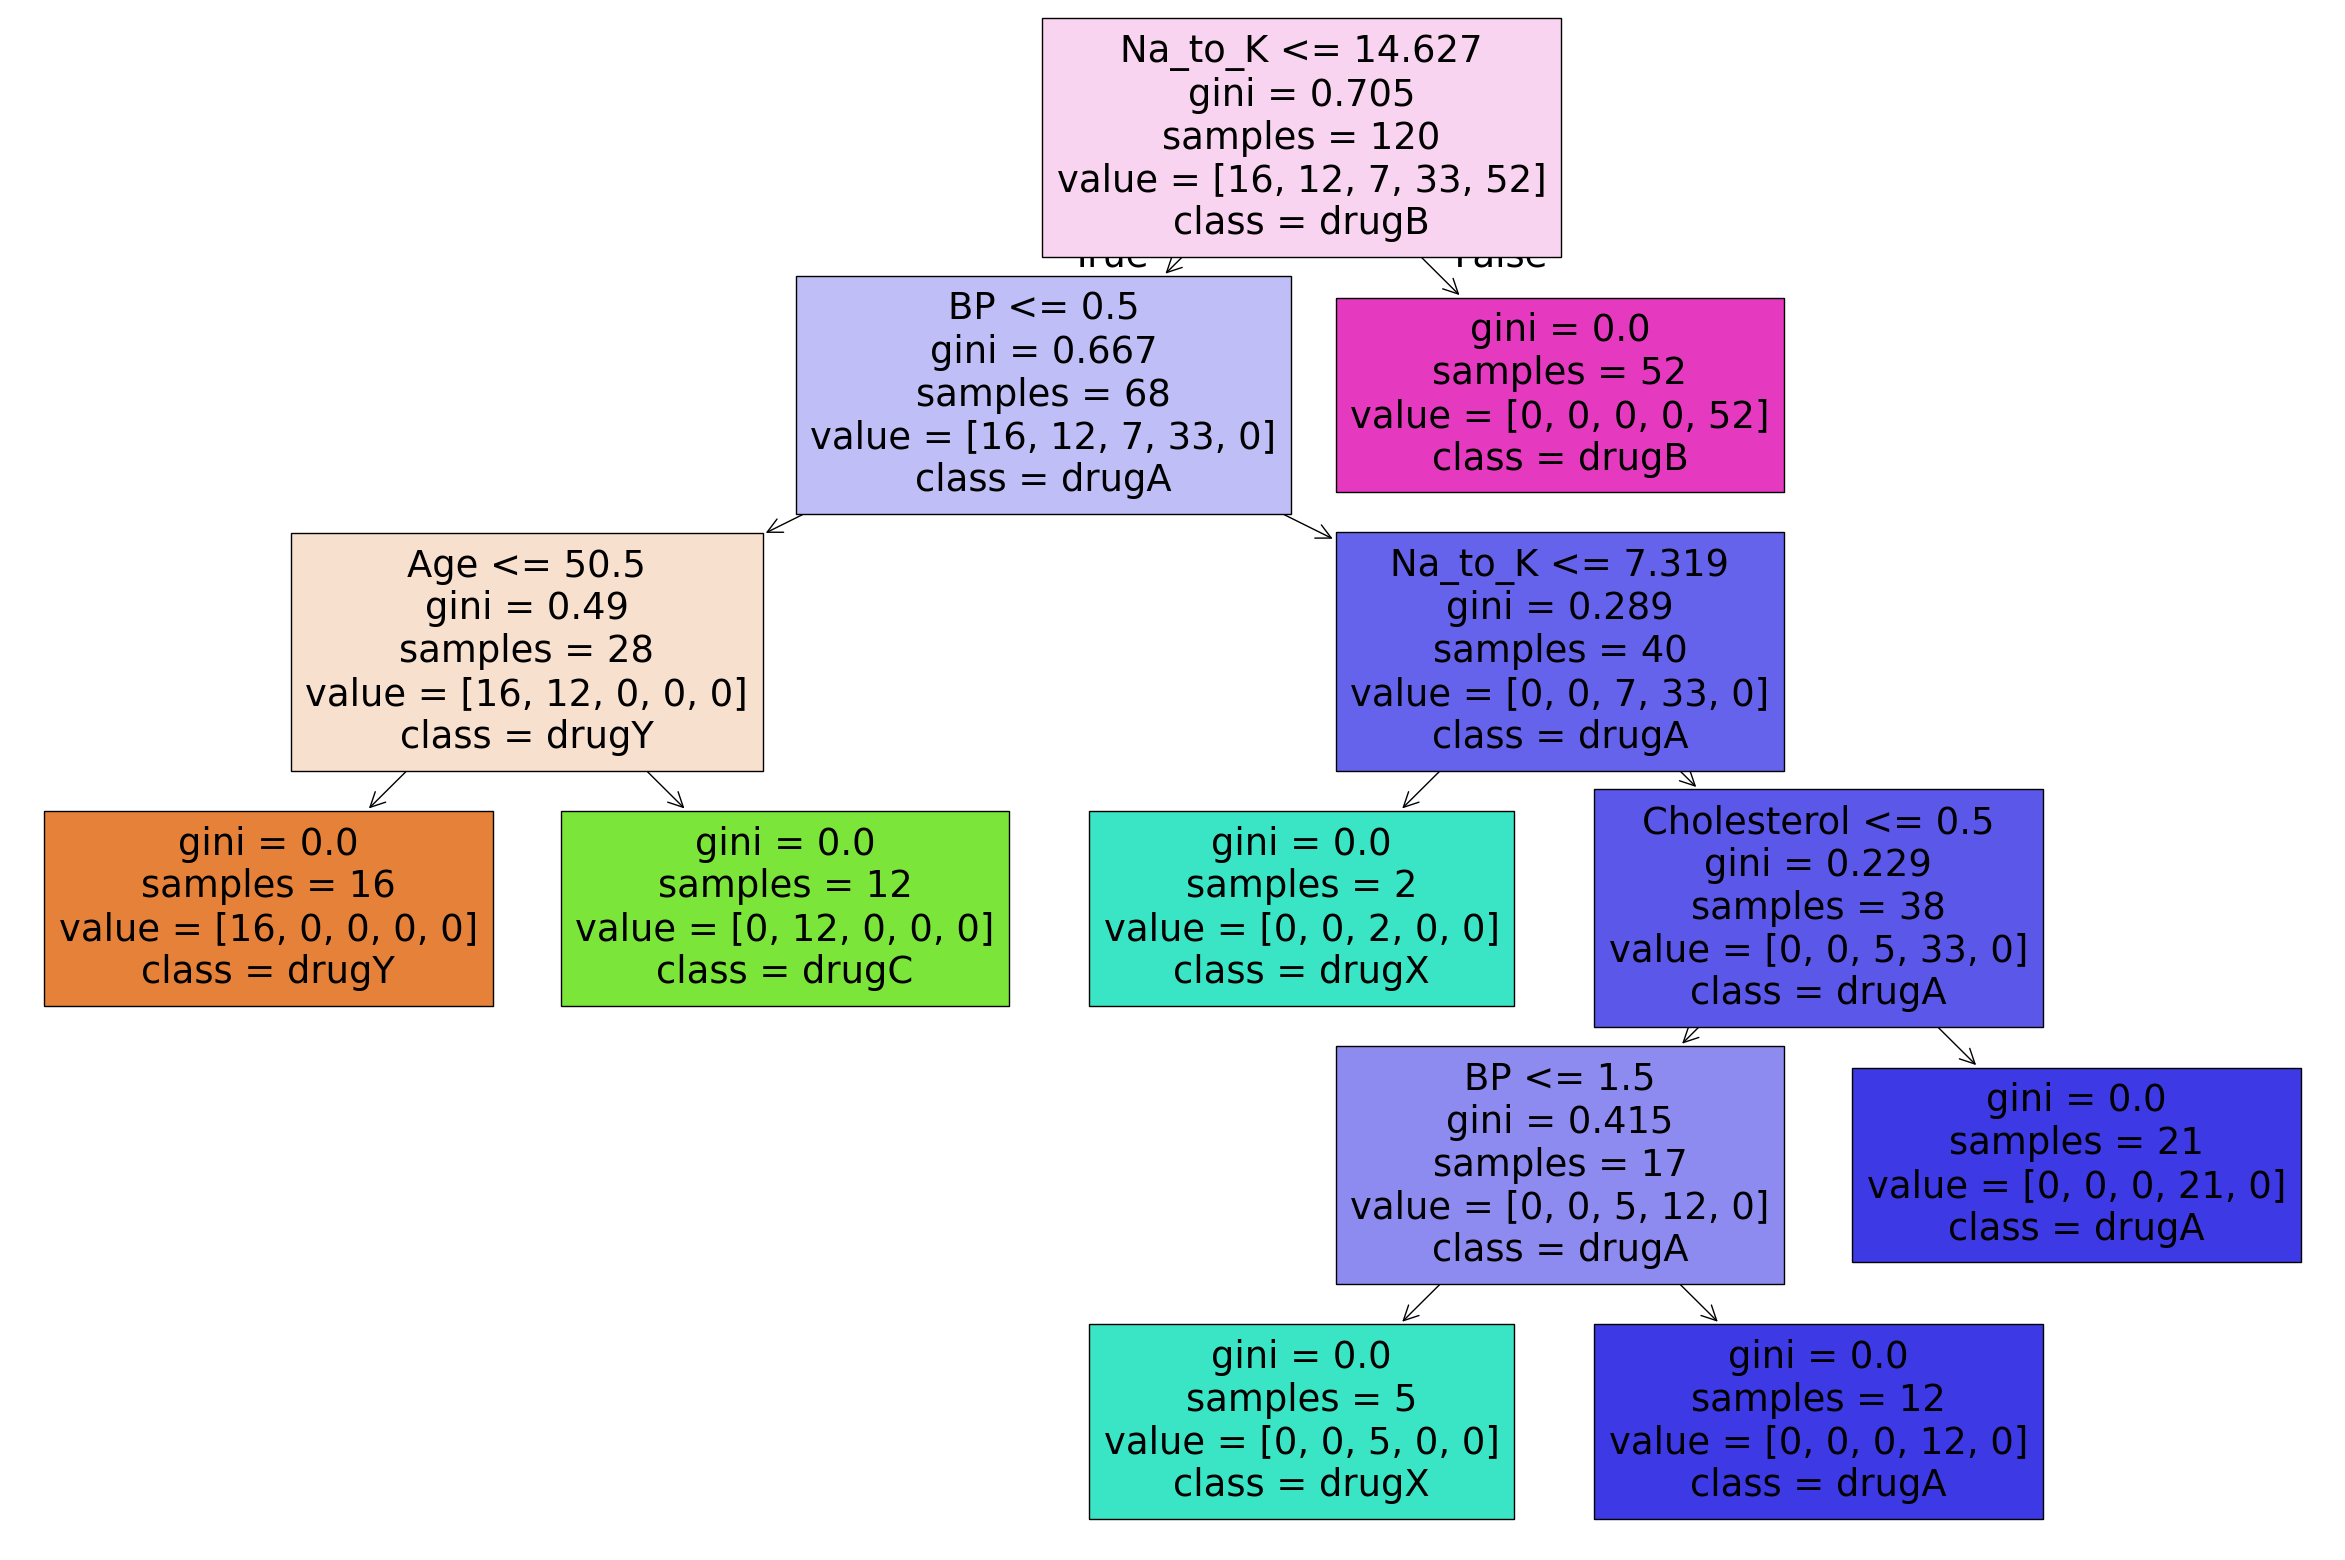

In [16]:
cols = df.drop('Drug', axis=1).columns
classes = df['Drug'].unique()

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes,filled=True)
plt.show()

# Hyperparameters

DecisionTrees's Accuracy:  0.95


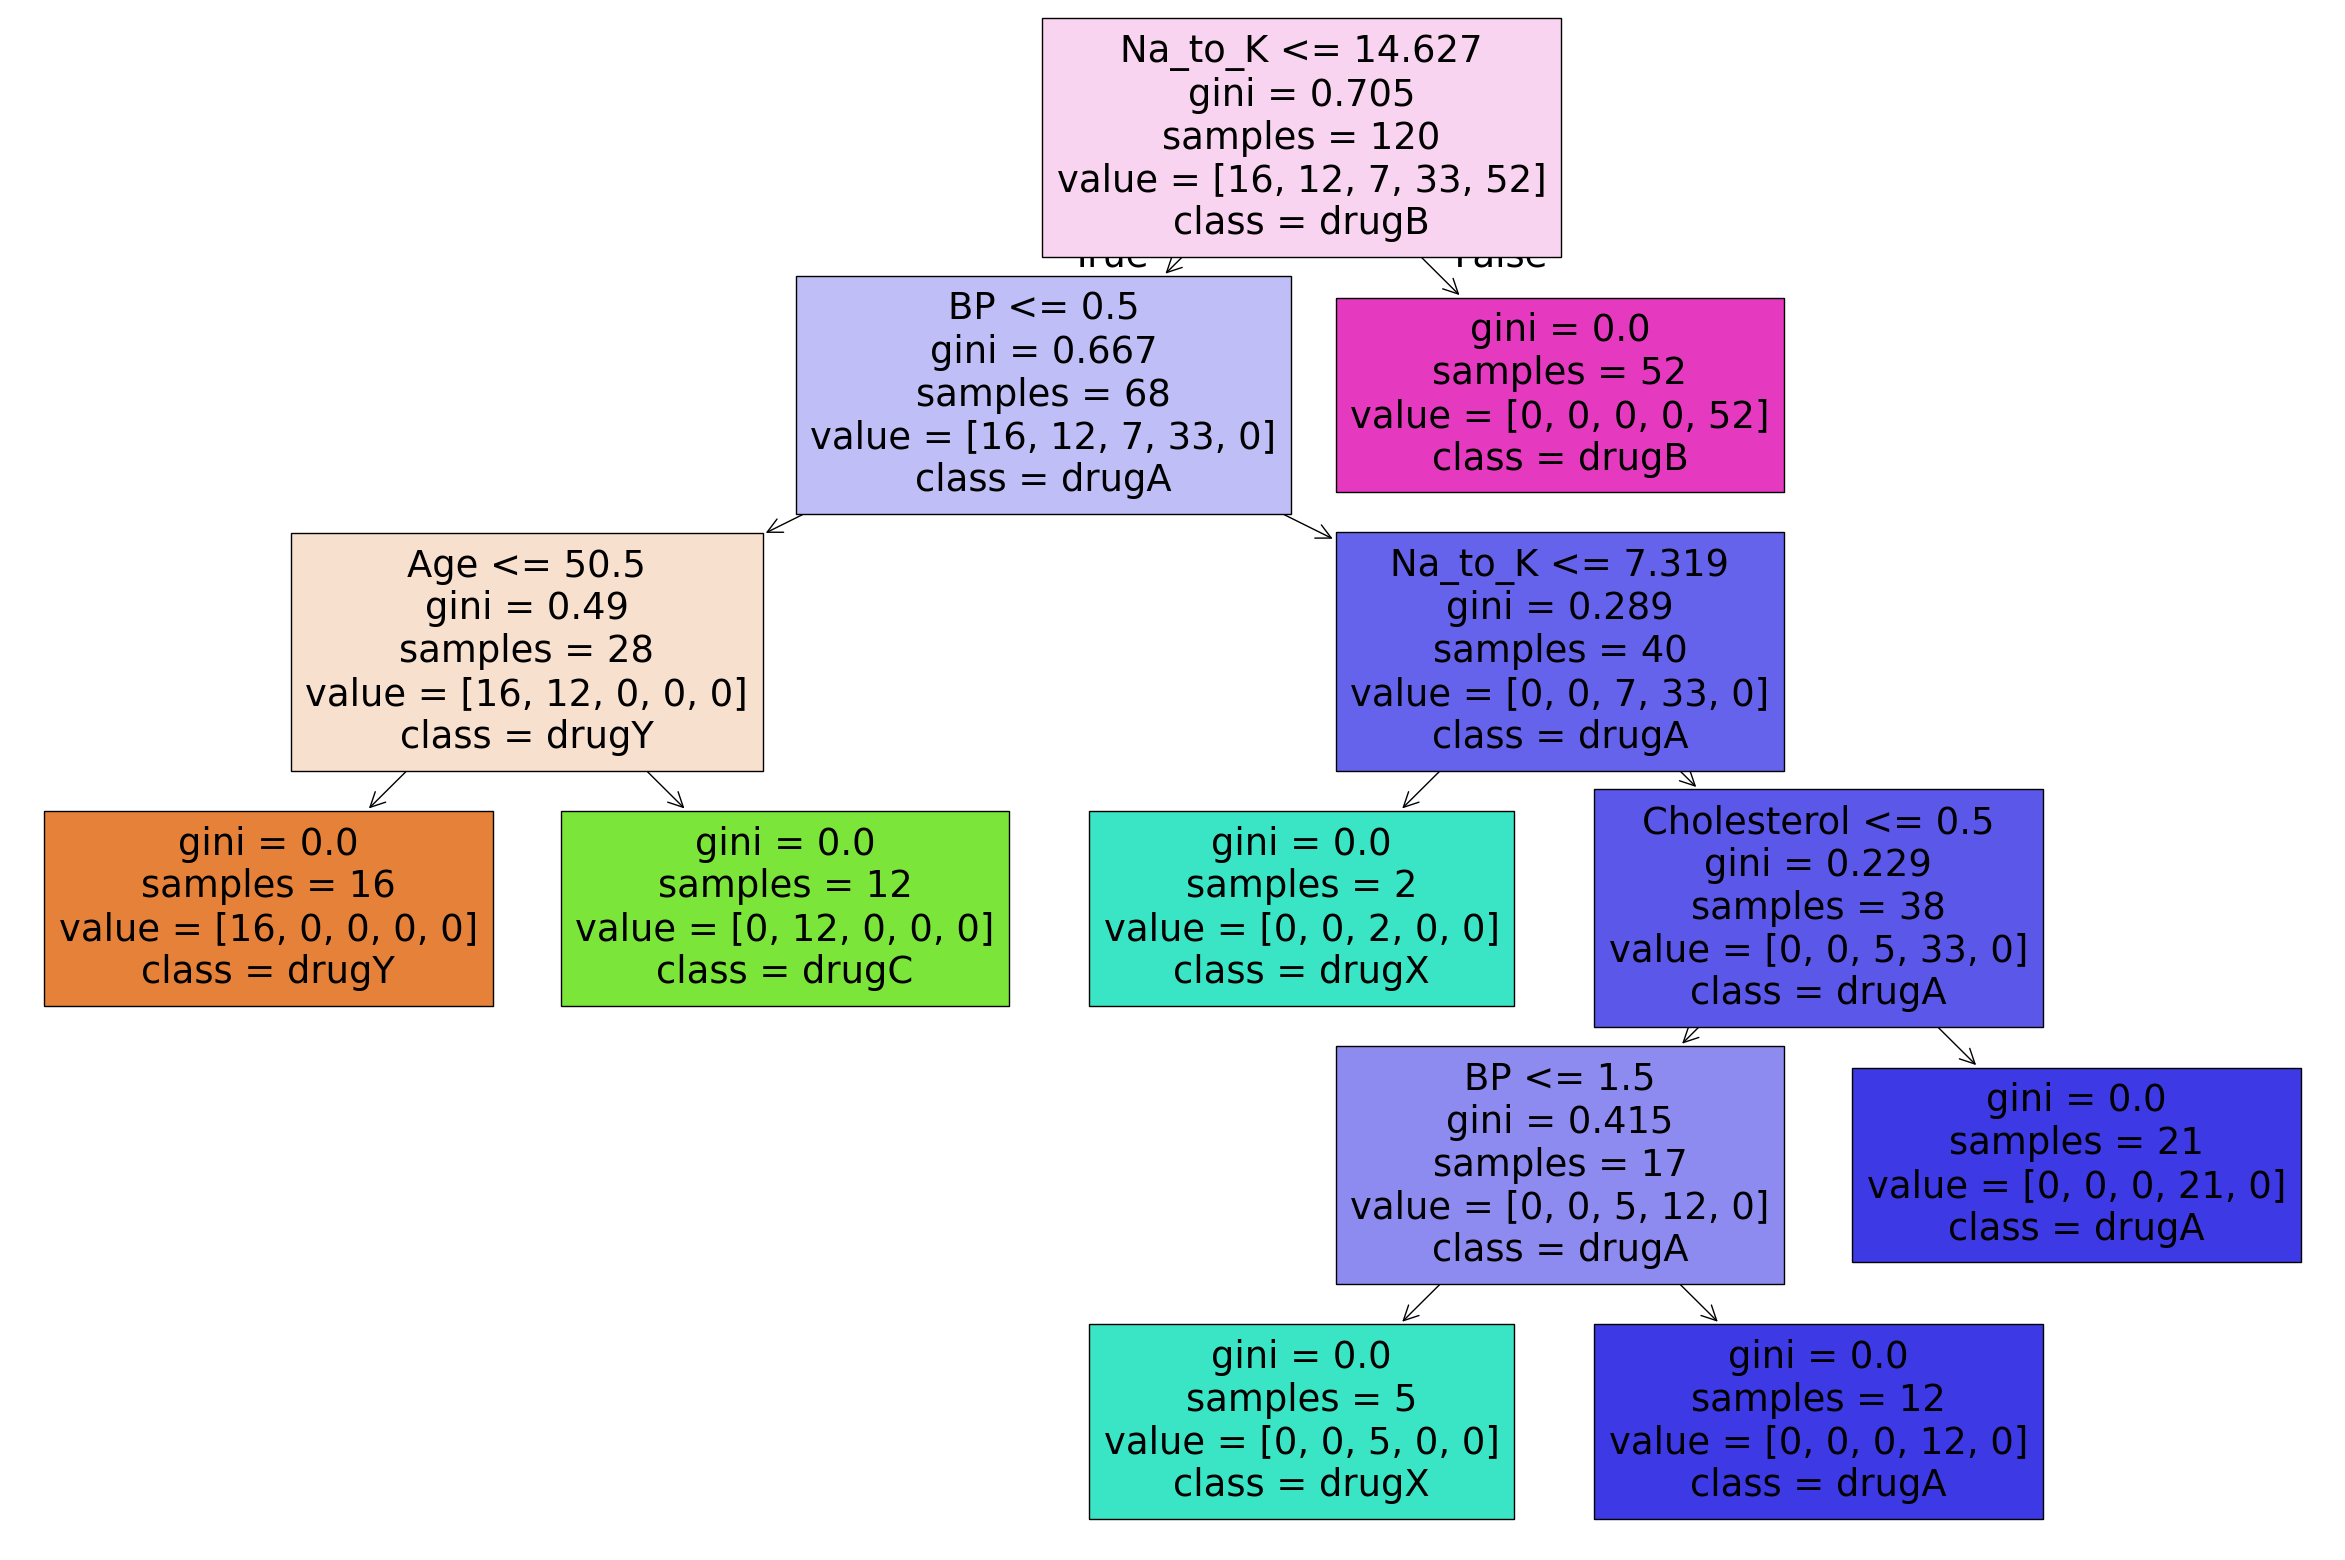

In [17]:
tree_model = DecisionTreeClassifier(min_impurity_decrease=0.01)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_predict))

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

**`max_depth`** - number of tree levels

DecisionTrees's Accuracy:  0.8375


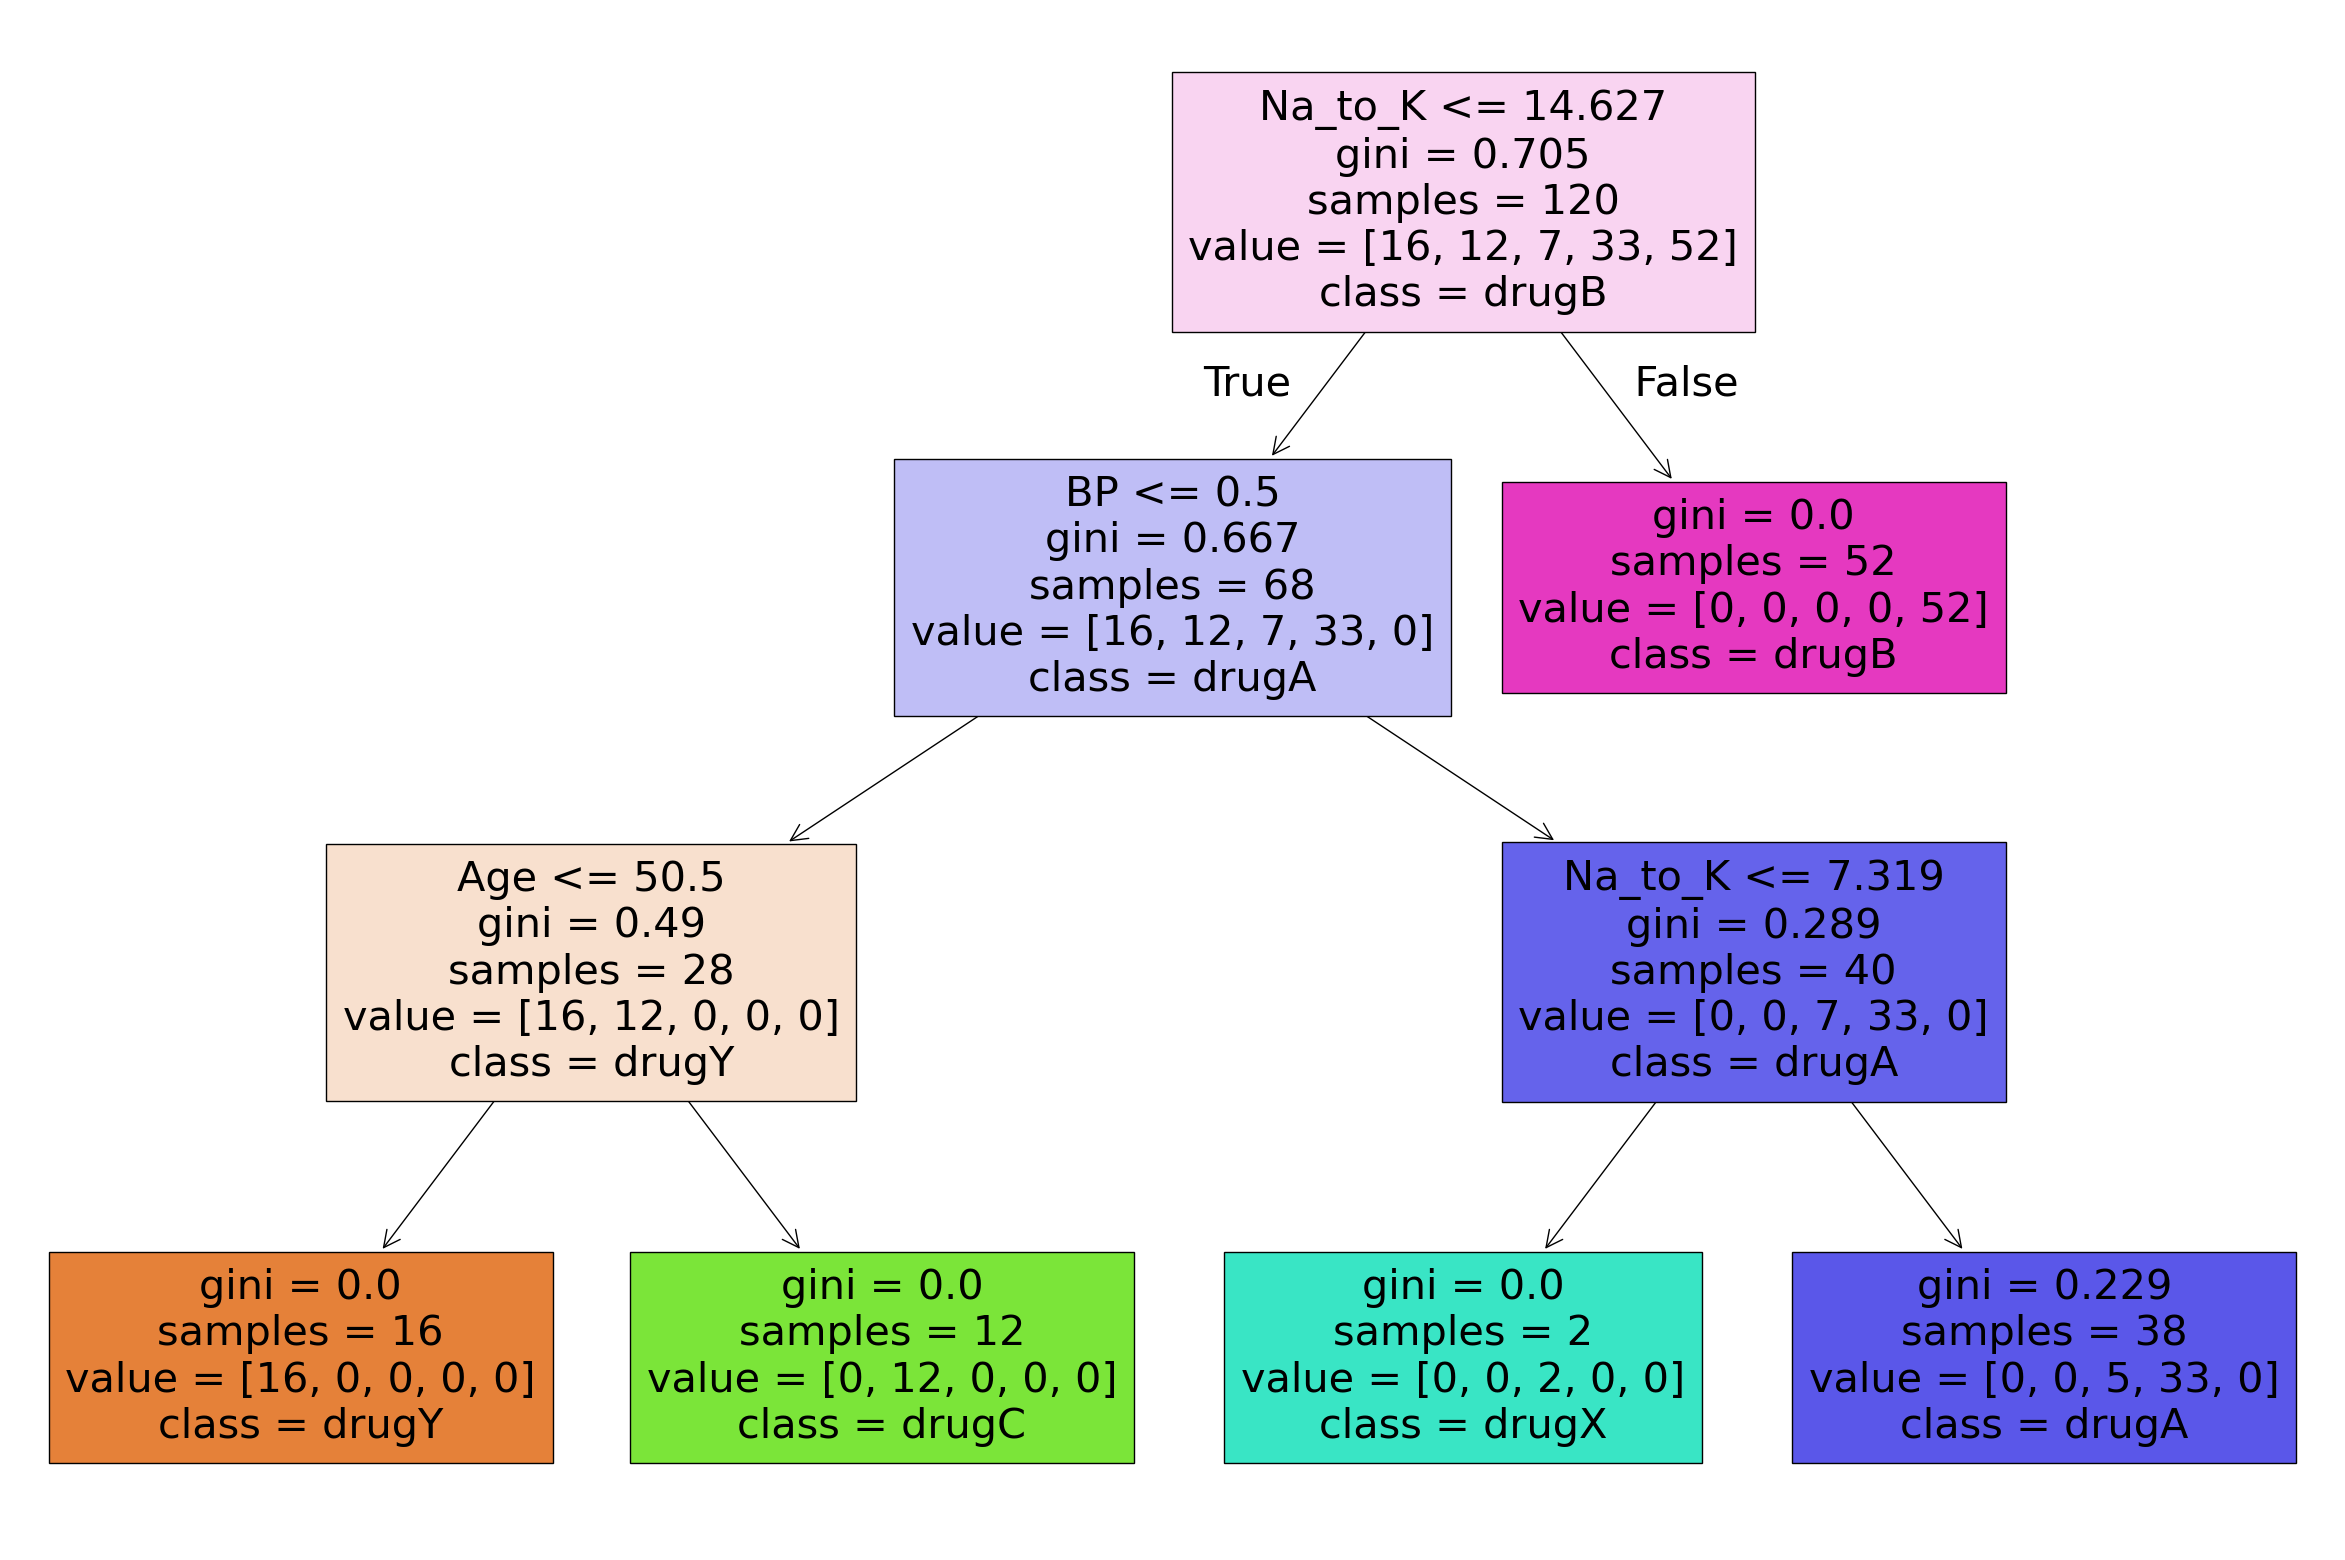

In [18]:
tree_model = DecisionTreeClassifier(min_impurity_decrease=0.0, max_depth=3)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_predict))

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

**`min_samples_leaf`** - minimum number of elements to form a leaf node (final, leaf node)

DecisionTrees's Accuracy:  0.875


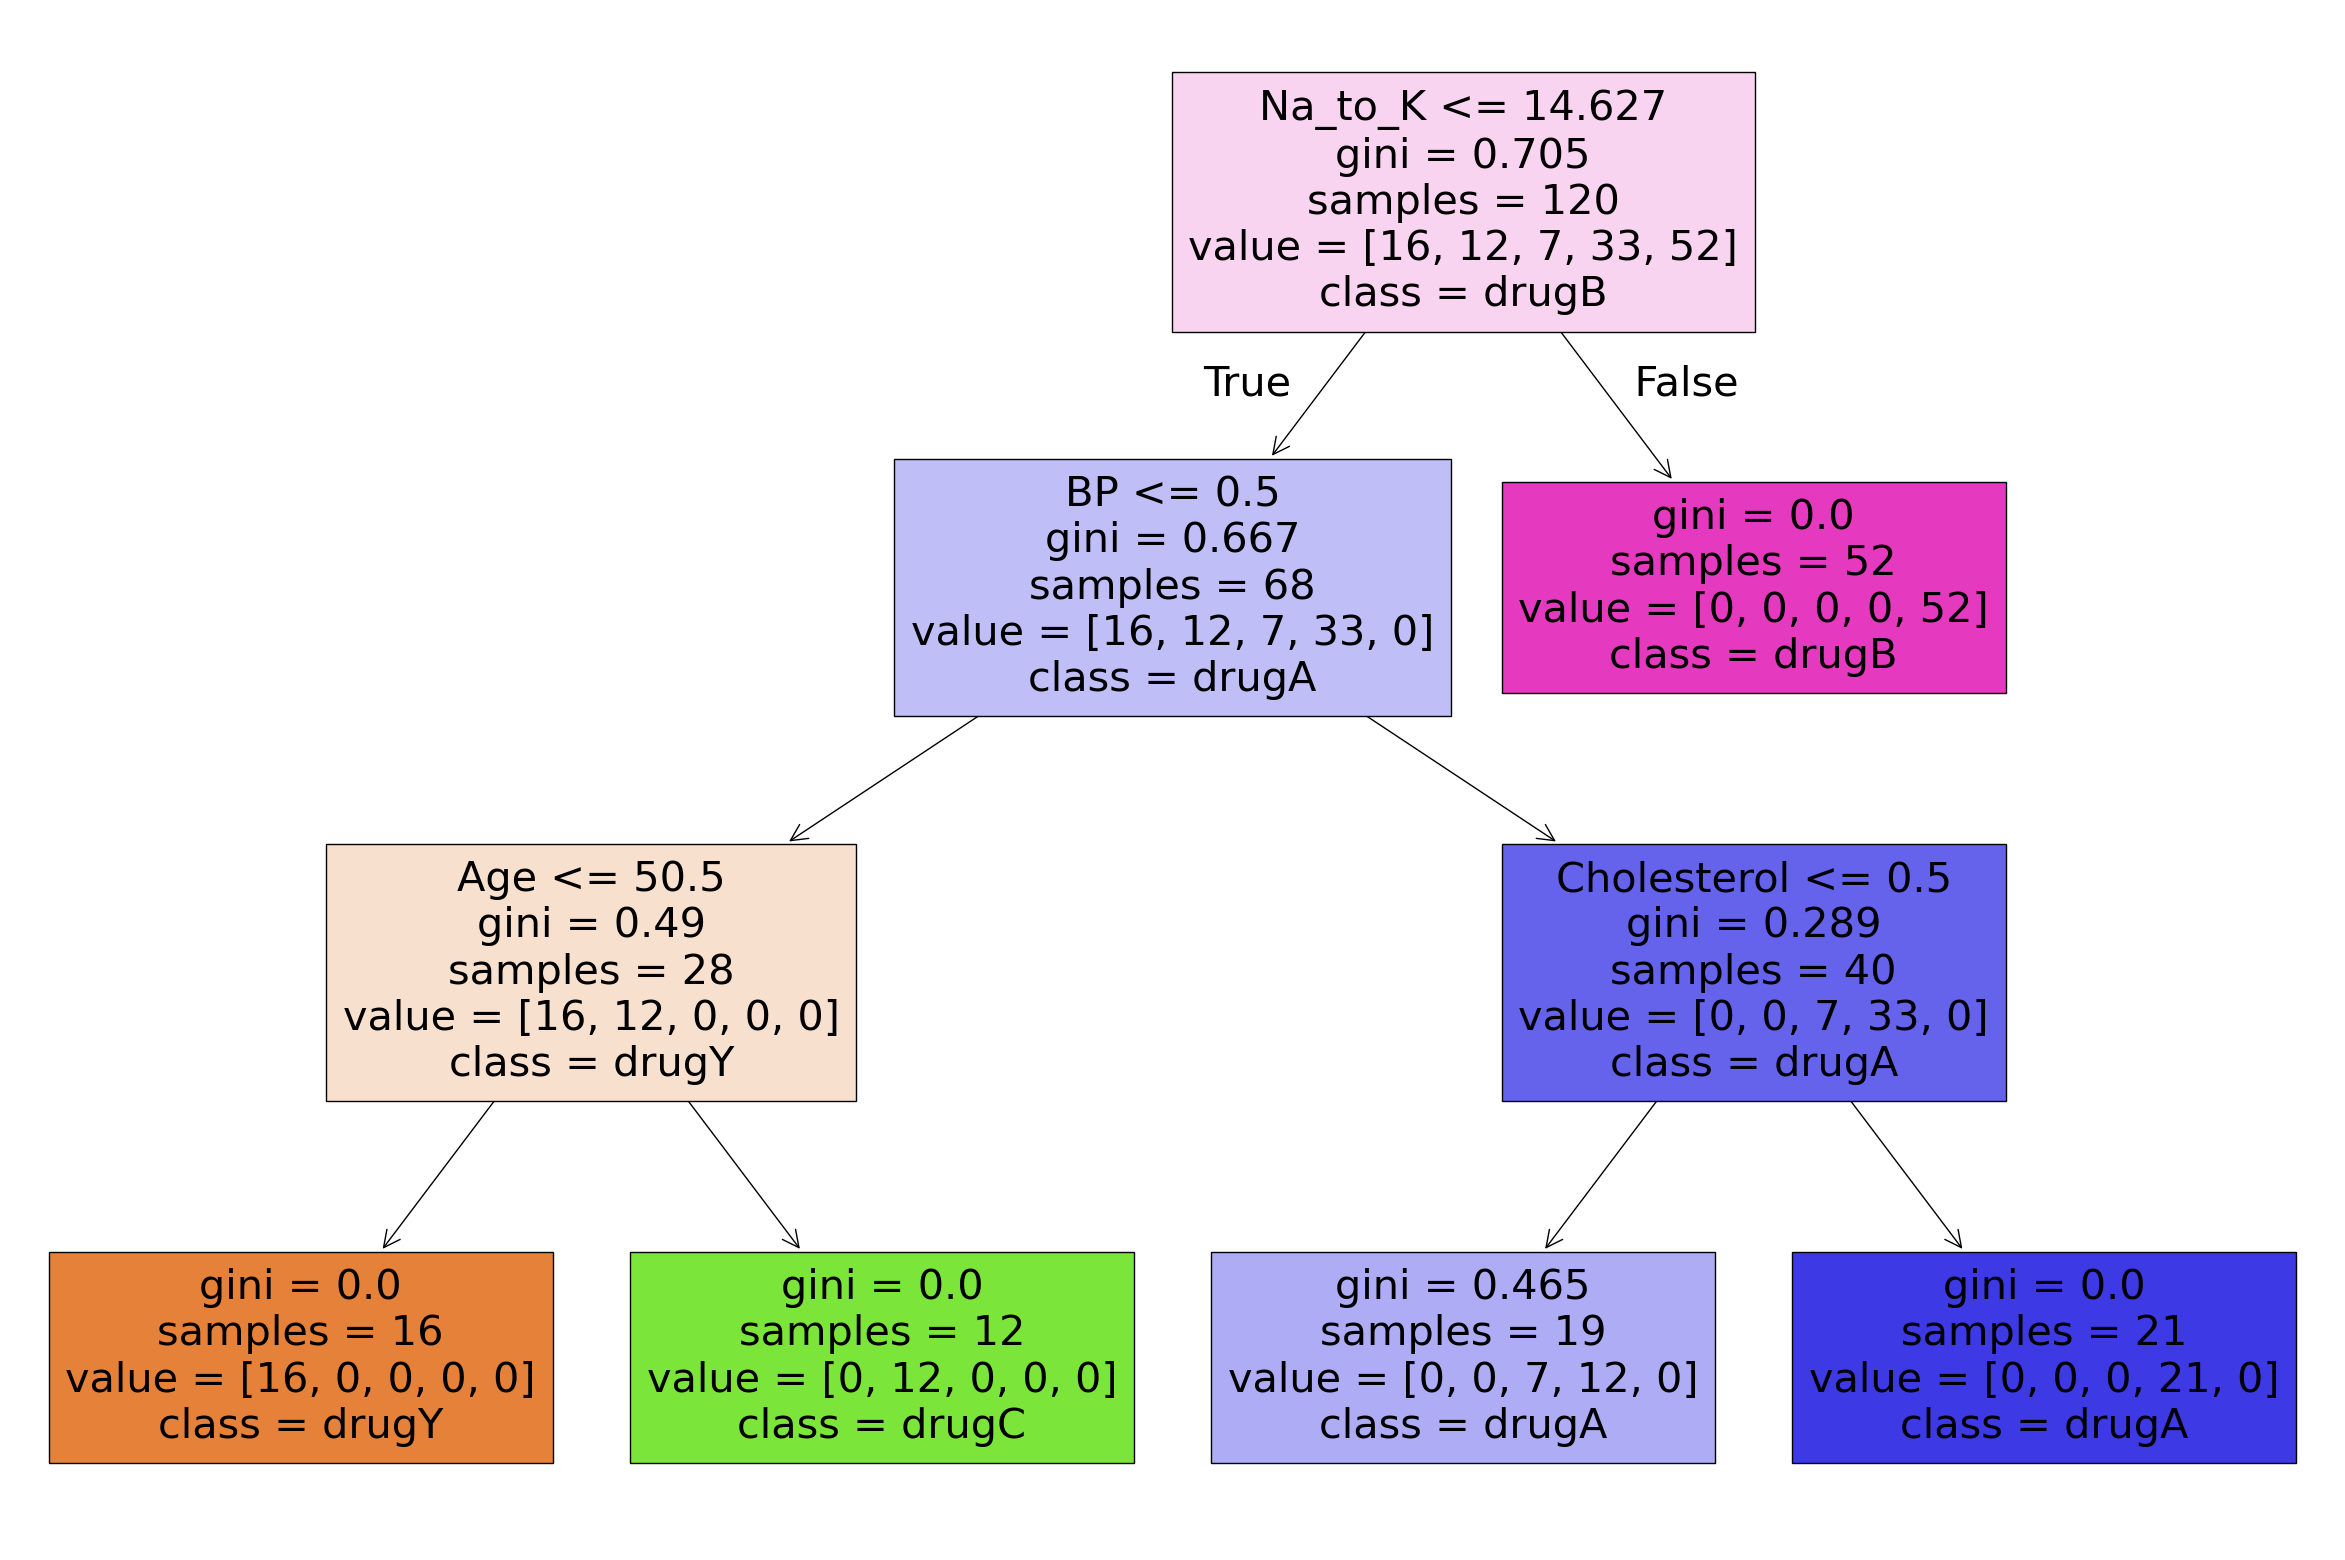

In [19]:
tree_model = DecisionTreeClassifier(min_samples_leaf=5, max_depth=3)
tree_model.fit(X_train, y_train)
y_predict = tree_model.predict(X_test)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_predict))

plt.figure(figsize=(30,20))
tree.plot_tree(tree_model, feature_names=cols, class_names=classes, filled=True)
plt.show()

## Random Forest

[Hyperparameters](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html):
- `n_estimators` - the number of trees in the forest.


In [20]:
rf_model = RandomForestClassifier(n_estimators=20)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       drugA       1.00      1.00      1.00         7
       drugB       1.00      1.00      1.00         4
       drugC       1.00      1.00      1.00         9
       drugX       1.00      0.95      0.98        21
       drugY       0.97      1.00      0.99        39

    accuracy                           0.99        80
   macro avg       0.99      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [21]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, y_pred))

DecisionTrees's Accuracy:  0.9875
